# Markov Chain


## Exercise

### Infect 1000

*There are 1,000 people in one room. One of them carries a disease which infects 100% if one shares hands with an infected person. In each minute all the people in the room are randomly paired to share hands with each other. What is your estimate of the expected number of people infected after 10 minutes? Can you use only pen and paper to solve this?*

#### Sol.1 Markov Chain

Let $I_t$ be the number of infected individuals after $t$ minutes. Define a transition matrix $\boldsymbol{P}=\left\{ p_{i,j} \right\}$, where

$$p_{i,j} = \mathrm{P}(I_{t+1}=j\vert I_t=i)$$

It's easy to see that

- $p_{1,2}=1$
- $p_{2,2}=\frac{1}{999}, p_{2,4}=\frac{998}{999}$

In general, we have, for $l=0,1,\ldots, \min(k, \frac{n}{2}-k)$,

$$p_{2k, 2(t+l)}= \frac{C_{2k}^{2l} C_{n-2k}^{2l} P_{2l}^{2l} R_{2k-2l} R_{n-2k-2l}}{R_{n}}$$

where
- $C_{2k}^{2l}$ is the number of ways to select $2l$ infected individuals from the total $2k$ infected individuals, to be paired with $2l$ healthy individuals
- $C_{n-2k}^{2l}$ is the number of ways to select $2l$ healthy individuals from the total $n-2k$ healthy individuals, to be paired with $2l$ infected individuals
- $P_{2l}^{2l}$ is the number of ways to pair $2l$ infected individuals and $2l$ healthy individuals, such that additional $2l$ individuals are infected
- $R_m$ is the number of ways to arrange a even number $m$ of individuals into $\frac{m}{2}$ pairs. It's easy to find

$$R_m=\frac{C_m^2C_{m-2}^2\ldots C_2^2 }{\frac{m}{2}!} = \frac{m!}{(2!)^{\frac{m}{2}}(\frac{m}{2}!)}$$

- $R_{2k-2l}$ is the number of ways to arrange $2k-2l$ infected individuals into pairs, who do not share hands with healthy individuals
- $R_{n-2k-2l}$ is the number of ways to arrange $n-2k-2l$ healthy individuals into pairs, who do not share hands with infected individuals and keep being healthy
- $R_n$ is the total number of ways to arrange $n$ people into $n/2$ pairs in the room

Simplification gives

$$p_{2k, 2(k+l)} =\frac{C_{n/2}^{k+l}C_{k+l}^{2l}4^l}{C_n^{2k}}$$

Then the distribution of $I_{10}$ is

$$\boldsymbol{p}_{I_{10}}^\top=\boldsymbol{e}_1^\top \boldsymbol{P}^{10}$$

where $\boldsymbol{e}_1 = [1,0,\ldots,0]$ and $\boldsymbol{p}_{I_{10}} = [p_{1,1}^{(10)}, \ldots, p_{1,n}^{(10)}]$

The expected number is

$$\mathrm{E}(I_{10}) = [1,2,3,\ldots, n]^\top\boldsymbol{p}_{I_{10}} $$

A python script to implement the above steps:

In [1]:
import numpy as np
import scipy.sparse as sparse
from scipy.special import comb, perm, factorial

n = 1000
t = 10
ks = list(range(1, 500+1))
rows = [0, 1]
cols = [0, 2]
ps = [0, 1]
for k in ks:
    for l in range(0, int(min(k, n/2-k))+1):
        rows.append(2 * k)
        cols.append(2 * (k+l))
        ps.append(comb(n/2, k+l) * comb(k+l, 2*l) * 4**l / comb(n, 2*k))

P = sparse.coo_matrix((ps, (rows,cols)), shape=(n+1, n+1))
Pt = P**t
distribution = Pt[1, :]
Et = sum([i * distribution.toarray()[0, i] for i in range(1, n+1)])
print(Et)

642.3471200227277


#### Sol.2 Conditional Expectation

Let $p_{t,j}$ be the probability that infected individual $j$ is paired with a **healthy** individual from time $t$ to $t+1$, we have

$$p_{t,j} = \frac{n-I_t} {n - 1} =: p_t$$

Let $I_{t+1, j}$ be the number of individuals infected by infected individual $j$ from time $t$ to $t+1$, we have

$$
I_{t+1,j}=\begin{cases}
1 & p_{t}\\
0 & 1-p_{t}
\end{cases}
$$

Hence,

$$
\begin{align}
\mathrm{E}\left( I_{t+1, j} \right) &= p_{t} \times 1 + (1-p_{t}) \times 0  \\
& = p_{t} \\
\end{align}
$$

Therefore, the conditional expectation of the total number of infected individuals is given by

$$
\begin{align}
\mathrm{E}(I_{t+1}|I_t) & = \mathrm{E}\left( I_t +  \sum_{j=1}^{I_t} I_{t+1,j} \right)\\
&= I_t + \sum_{j=1}^{I_t} \mathrm{E}\left( I_{t+1, j} \right) \\
& = I_t + I_t \times p_t \\
& = I_t + I_t \times \frac{n-I_t}{n - 1} \\
\end{align}
$$

How to solve it?

By the law of total expectation,

$$
\begin{align}
\mathrm{E}(I_{t+1}) & = \mathrm{E}\left( \mathrm{E}(I_{t+1}|I_t) \right) \\
& = \mathrm{E}\left(I_t + I_t \times \frac{n-I_t}{n - 1} \right)\\
& = \frac{2n-1}{n-1}\mathrm{E}\left( I_t \right) - \frac{1}{n-1}\mathrm{E}\left( I_t^2 \right)
\end{align}
$$

In particular, since $\mathrm{P}(I_1=2\vert I_0=1)=1$, there is no randomness in $I_1$, such that

$$
\begin{align}
\mathrm{E}(I_2) &= \mathrm{E}\left( \mathrm{E}(I_2\vert I_1) \right) \\
&= \mathrm{E}\left(I_1 + I_1 \times \frac{n-I_1}{n - 1}\right)\\
& = 2 + 2 \times 998 / 999 \\
& = 3994/999
\end{align}
$$

But when $t\ge 3$, the computation become complicated due to the second-order term $\mathrm{E}\left( I_t^2 \right)$

One attempt is to approximate $\mathrm{E}\left( I_t^2 \right)$ by $\left[ \mathrm{E}\left( I_t \right) \right]^2$ such that we have a **recurrence relation**

$$\mathrm{E}\left( I_{t+1} \right) \approx \frac{2n-1}{n-1}\mathrm{E}\left( I_t \right) - \frac{1}{n-1}\left[ \mathrm{E}\left( I_t \right) \right]^2$$

Note that this will lead to a larger result since $\mathrm{E}\left( I_t^2 \right) - \left[ \mathrm{E}\left( I_t \right) \right]^2 = \mathrm{Var}\left( I_t \right) \ge 0$. But since $\mathrm{Var}\left( I_t \right)$ is small, the positive error is also small.

A python script of the iteration is

In [2]:
def f(n, t, I0=1):
    Is = [I0] # initial number of infected
    for _ in range(1, t+1):
        Is.append(Is[-1] + Is[-1] * (n - Is[-1]) / (n - 1))

    return Is[-1]

n = 1000
t = 10
print(f(n, t))

642.9754330548355


The result $642.975$ is slightly larger than the result $642.347$ in Solution 1.

If we take a closer look at the recurrence relation, dividing $2n-1$ on both sides gives

$$\frac{\mathrm{E}\left( I_{t+1} \right)}{2n-1} \approx \frac{2n-1}{n-1} \frac{\mathrm{E}\left( I_t \right)}{2n-1} - \frac{2n-1}{n-1}\left[ \frac{\mathrm{E}\left( I_t \right)}{2n-1} \right]^2$$

Let $x_t = \frac{\mathrm{E}\left( I_t \right)}{2n-1}$ then it becomes

$$x_{t+1} \approx 2x_t(1-x_t)$$

when $n$ is large.

Given $x_0$, if the equality holds, we can solve for $x_t$ by

$$x_{t} = \frac{1}{2}\left\{1-\exp \left[2^{t} \ln \left(1-2 x_{0}\right)\right]\right\}$$

For details, see [Logistic Map](https://mathworld.wolfram.com/LogisticMap.html).

#### Sol.3 Simulation

To verify the solutions above, we can simulate the infection process.

In [3]:
import numpy as np

class Population():
    def __init__(self, n):
        self.size = n
        self.infected = np.array([0]) # indexes of infected individuals

    def count_infected(self):
        return len(self.infected)

    def infect(self, t=1, return_records=False):
        """
        simulate infection for t minutes
        """
        It_records = []
        for _ in range(t):
            perm = np.random.permutation(self.size)
            perm_pairs = perm.reshape(n//2, 2) # random pairs
            status = np.isin(perm, self.infected, assume_unique=True)
            status_pairs = status.reshape(self.size//2, 2)
            new_pairs = np.logical_xor(status_pairs[:,0], status_pairs[:,1])
            new_boolean = ~status_pairs[new_pairs]
            new_individuals = perm_pairs[new_pairs][new_boolean].flatten()
            self.infected = np.hstack((self.infected, new_individuals))
            It_records.append(self.count_infected())

        if return_records:
            return np.array(It_records)



np.random.seed(0)
n = 1000
t = 10
pop = Population(n)
pop.infect(t)
print(pop.count_infected())

658


To get the expected number $E(I_{10})$, we can try to simulate $m$ times and take the average.

In [4]:
np.random.seed(0)
m = 10000
t = 10
Its = np.empty((m,t))
for i in range(m):
    pop = Population(n)
    Its[i] = pop.infect(t, return_records=True)
print(Its[:, 9].mean())

642.2862


We see the simulation result $642.286$ is quite close to the result $E(I_{10}) = 642.347$ in Solution 1.

The plot below shows $m$ trajectories of $I_t$ in the simulation. We can see all lines are close to each other, which verifies that the variance is quite small.

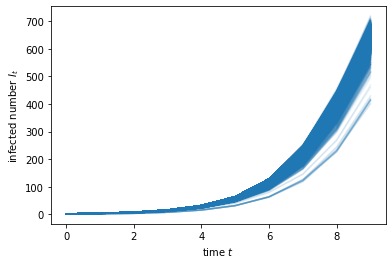

In [5]:
import matplotlib.pyplot as plt
for row in range(m):
    plt.plot(Its[row], c='C0', alpha=0.1)
plt.ylabel(r'infected number $I_t$')    
plt.xlabel(r'time $t$')    
plt.show()